In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
from utils import get_corpus, WordsToLetter
from pprint import pprint
from functools import reduce

original_corpus = get_corpus('corpus_otomi_original')
hard_corpus = get_corpus('corpus_hard')

corpora = original_corpus + hard_corpus

In [112]:
def graph_maker(data, conf):
    plt.rcParams['figure.figsize'] = [conf['width'], conf['height']]
    plt.grid()
    plt.xticks(rotation=90)
    plt.yscale('log', basey=2)
    plt.xlabel(conf["xlabel"], fontsize=conf["fontsize"])
    plt.ylabel(conf["ylabel"], fontsize=conf["fontsize"])
    plt.title(conf["title"], fontsize=conf["fontsize"])
    plt.tick_params(axis='both', direction='out', length=5, width=5, labelcolor=conf['labelcolor'],
                    colors=conf['tickscolor'], grid_color=conf['gridcolor'], grid_alpha=0.5)
    if conf["limit"] >= 1:
        plt.plot(list(data.keys())[:conf['limit']], list(data.values())[:conf['limit']], color=conf['color'], linestyle='-.', linewidth=3)
    else:
        plt.plot(list(data.keys()), list(data.values()), color=conf['color'], linestyle='-.', linewidth=3)
    plt.savefig(conf['path'], dpi=300, bbox_inches='tight')
    plt.show()

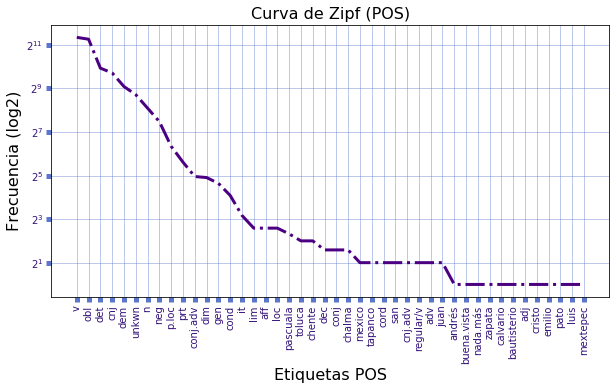

In [104]:
# Distribución de las etiquetas POS
conf = {"width": 10, "height": 5, "fontsize": 16, "xlabel": "Etiquetas POS", "ylabel": "Frecuencia (log2)",
        "title": "Curva de Zipf (POS)", "labelcolor": '#32127a', "tickscolor": '#5d76cb', "gridcolor": "#5d76cb", "color": "Indigo",
        "path": "latex/img/zipf_pos.png", "limit": -1}

graph_maker(pos, conf)

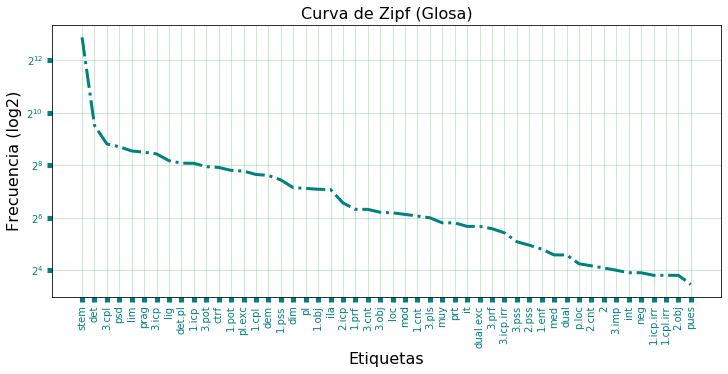

In [105]:
# Distribución de la glosa
conf = {"width": 12, "height": 5, "fontsize": 16, "xlabel": "Etiquetas", "ylabel": "Frecuencia (log2)",
        "title": "Curva de Zipf (Glosa)", "labelcolor": '#008080', "tickscolor": 'teal', "gridcolor": "#7fcc99", "color": "teal",
        "path": "latex/img/zipf_gloss.png", "limit": 50}

graph_maker(gloss, conf)

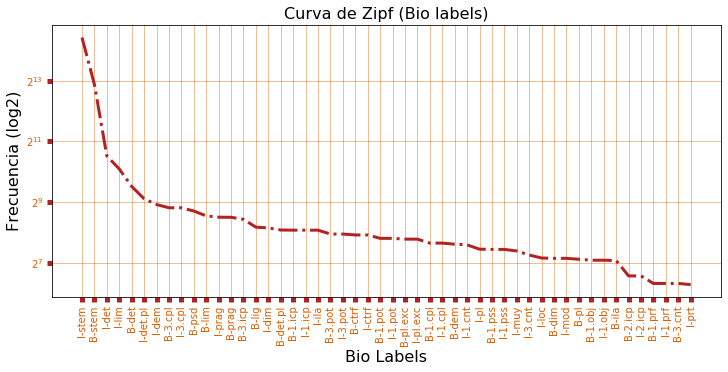

In [117]:
# Distribución de las Bio Labels
conf = {"width": 12, "height": 5, "fontsize": 16, "xlabel": "Bio Labels", "ylabel": "Frecuencia (log2)",
        "title": "Curva de Zipf (Bio labels)", "labelcolor": '#da5c00', "tickscolor": 'firebrick', "gridcolor": "#da5c00", "color": "firebrick",
        "path": "latex/img/zipf_bio.png", "limit": 50}

graph_maker(bio, conf)

In [3]:
# Funciones auxiliares

def count_occurrence(bag, _type):
    if _type in bag.keys():
        bag[_type] += 1
    else:
        bag[_type] = 1
    return bag

def dict_sorter(data):
    # Ref https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value
    return {k: v for k, v in sorted(data.items(), key=lambda item: item[1], reverse=True)}

In [4]:
# Funciones que procesan el corpus

def get_tokens(corpus):
    gloss_tags, pos_tags = dict(), dict()
    for frases in corpus:
        for frase in frases:
            for parte in frase[:-1]:    
                gloss_tags = count_occurrence(gloss_tags, parte[1])
            pos_tags = count_occurrence(pos_tags, frase[-1])
    return dict_sorter(pos_tags), dict_sorter(gloss_tags)

def get_bio_tokens(corpus):
    bio_tokens = dict()
    frases = WordsToLetter(corpus)
    for frase in frases:
        for letras in frase:
            for letra in letras:
                bio_tokens = count_occurrence(bio_tokens, letra[-1])  # Only Bio Label
    return dict_sorter(bio_tokens)

In [107]:
# Obteniedo datos del corpus
pos, gloss = get_tokens(corpora)
bio = get_bio_tokens(corpora)

pos_types = pos.keys()
gloss_types = gloss.keys()
bio_types = bio.keys()

In [ ]:
# Reportando tamaño de tipos y tokens

print("Frases etiquetadas corpus original:", len(original_corpus))
print("Frases etiquetadas corpus retador:", len(hard_corpus))
print("Frases etiquetadas totales:", len(corpora))

print("Numero de tokens POS:", reduce(lambda x, y: x + y, pos.values()))
print("Numero de tipos POS:", len(pos_types))

print("Numero de tokens GLOSA:", reduce(lambda x, y: x + y, gloss.values()))
print("Numero de tipos GLOSA:", len(gloss_types))

In [ ]:
def types_to_table(data, columns):
    return "".join([t + " \\\\\n " if i % columns == 0 else t + " & " for i, t in enumerate(data, start=1)])

def tokens_to_table(data, limit=0):
    table = ""
    if limit:
        counts = list(data.items())[:limit]
    else:
        counts = data.items()
    for key, count in counts:
        table += f"{key} & {count} \\\\\n"
    return table

In [ ]:
# Cuenta de Bio Labels a cuerpo de tabla latex 
print(tokens_to_table(bio, limit=10))

In [ ]:
# Cuenta de etiquetas POS a cuerpo de tabla latex 
print(tokens_to_table(pos, limit=10))

In [ ]:
# Cuenta de etiquetas de glosa a cuerpo de tabla latex 
print(tokens_to_table(gloss, limit=10))

In [ ]:
# Tipos de etiquetas POS a cuerpo de tabla Latex 
print(types_to_table(pos_types, 5))

In [ ]:
# Tipos de etiquetas de glosa a cuerpo de tabla Latex 
print(types_to_table(gloss_types, 7))

In [ ]:
# Tipos de etiquetas BIO a cuerpo de tabla Latex 
print(types_to_table(bio_types, 6))